In [1]:
import ipywidgets as widgets
from ipywidgets import interact, fixed
import doodads as dd
import astropy.units as u
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Wavelength [m]', ylabel='Transmission'>

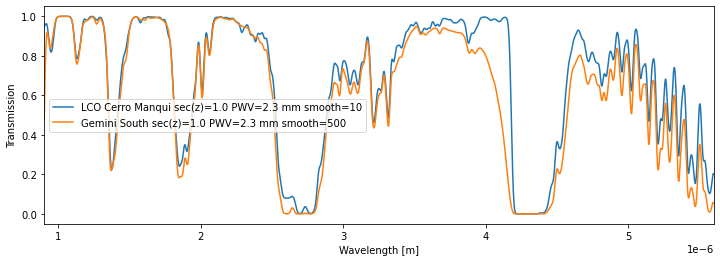

In [2]:
plt.figure(figsize=(12, 4))
dd.MANQUI_ATMOSPHERES.get(airmass=1, pwv=2.3 * u.mm).smooth(10).display()
dd.GEMINI_SOUTH_ATMOSPHERES.get(airmass=1, pwv=2.3 * u.mm).smooth(500).display()

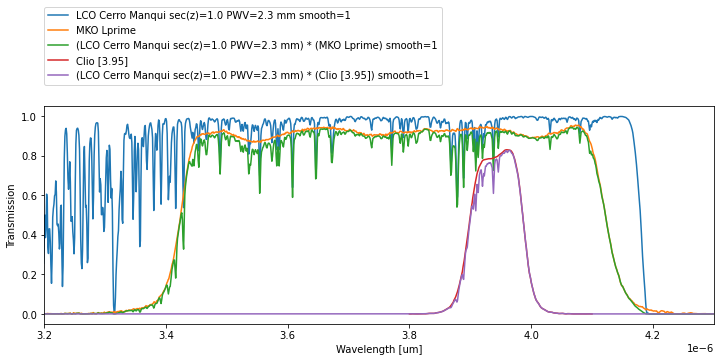

In [3]:
def plot_one_atmosphere(library, pwv_mm, airmass=1, smooth=1):
    fig, ax = plt.subplots(figsize=(12, 4))
    spec = library.get(airmass=airmass, pwv=pwv_mm * u.mm)
    spec.smooth(smooth).display(ax=ax)
    dd.MKO.Lprime.display(ax=ax)
    spec.multiply(dd.MKO.Lprime).smooth(smooth).display(ax=ax)
    dd.CLIO_3_9_FILTER.display(ax=ax)
    spec.multiply(dd.CLIO_3_9_FILTER).smooth(smooth).display(ax=ax, begin=3.2*u.um, end=4.3*u.um)
    plt.legend(loc=(0, 1.1))

plot_one_atmosphere(dd.MANQUI_ATMOSPHERES, 2.3, 1)

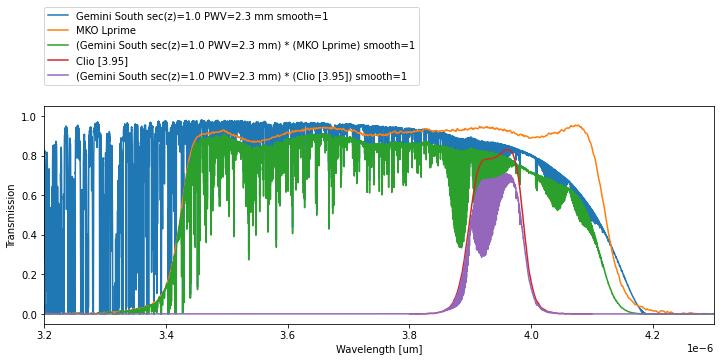

In [4]:
plot_one_atmosphere(dd.GEMINI_SOUTH_ATMOSPHERES, 2.3, 1)

In [5]:
interact(plot_one_atmosphere, 
         library=fixed(dd.MANQUI_ATMOSPHERES),
         smooth=(1, 100, 1),
         **{name: (val[0], val[1], 0.01) for name, val in dd.MANQUI_ATMOSPHERES.bounds.items()});

interactive(children=(FloatSlider(value=6.25, description='pwv_mm', max=12.5, step=0.01), FloatSlider(value=1.…

In [6]:
interact(plot_one_atmosphere, 
         library=fixed(dd.GEMINI_SOUTH_ATMOSPHERES),
         smooth=(1, 100, 1),
         **{name: (val[0], val[1], 0.01) for name, val in dd.GEMINI_SOUTH_ATMOSPHERES.bounds.items()});

interactive(children=(FloatSlider(value=6.15, description='pwv_mm', max=10.0, min=2.3, step=0.01), FloatSlider…